In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd

# # 데이터 프레임 생성
# train_df = pd.DataFrame({'image_paths': train_image_paths, 'labels': train_labels})
# validation_df = pd.DataFrame({'image_paths': validation_image_paths, 'labels': validation_labels})

# # 데이터 제너레이터 설정
# train_datagen = ImageDataGenerator(
#     rescale=1. / 255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# validation_datagen = ImageDataGenerator(rescale=1. / 255)

# # 훈련 데이터 제너레이터 설정
# train_generator = train_datagen.flow_from_dataframe(
#     dataframe=train_df,
#     x_col='image_paths',
#     y_col='labels',
#     target_size=(224, 224),
#     batch_size=batch_size,
#     class_mode='categorical')

# # 검증 데이터 제너레이터 설정
# validation_generator = validation_datagen.flow_from_dataframe(
#     dataframe=validation_df,
#     x_col='image_paths',
#     y_col='labels',
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='categorical')



Found 1232 validated image filenames belonging to 3 classes.
Found 308 validated image filenames belonging to 3 classes.


In [30]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 데이터 경로 설정
train_data_dir = './detected_images'

# 데이터 증강을 위한 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 검증 데이터 비율 설정
)

# 훈련 데이터 및 검증 데이터 로드 및 증강
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # 훈련 데이터로 사용할 부분 지정
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 검증 데이터로 사용할 부분 지정
)


Found 1233 images belonging to 3 classes.
Found 307 images belonging to 3 classes.


In [32]:
from tensorflow.keras.layers import BatchNormalization

# 새로운 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(224, 224, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(256),
    Activation('relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(128),
    Activation('relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(3),  # 클래스 수에 맞게 변경
    Activation('softmax')  # 다중 클래스 분류를 위해 softmax 사용
])


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 activation_23 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_5 (Bat  (None, 111, 111, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 activation_24 (Activation)  (None, 109, 109, 64)     

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # 모델 실행의 옵션을 설정합니다.
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.Adam(learning_rate=0.0002),
#               metrics=['categorical_accuracy'])

from tensorflow.keras.optimizers.legacy import Adam

# 모델 실행의 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['accuracy'])



# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 가장 좋은 성능을 보이는 모델의 가중치를 저장하는 ModelCheckpoint 콜백 설정
model_checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_loss', save_best_only=True)

from tensorflow.keras.models import load_model

# 가장 좋은 성능을 보이는 모델의 가중치를 저장하는 ModelCheckpoint 콜백 설정
model_checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_loss', save_best_only=True)

# 모델을 실행합니다.
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback, model_checkpoint]  # ModelCheckpoint 콜백 추가
)

# 저장된 모델을 불러옵니다.
saved_model = load_model('best_cnn_model.h5')



Epoch 1/20
39/39 [==============================] - 58s 1s/step - loss: 1.3351 - accuracy: 0.4526 - val_loss: 1.2183 - val_accuracy: 0.4137
Epoch 2/20


/Users/Suhwan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/39 [==============================] - 60s 2s/step - loss: 1.1332 - accuracy: 0.5069 - val_loss: 1.1963 - val_accuracy: 0.4137
Epoch 3/20
39/39 [==============================] - 59s 2s/step - loss: 1.1241 - accuracy: 0.5410 - val_loss: 1.3360 - val_accuracy: 0.4137
Epoch 4/20
39/39 [==============================] - 58s 1s/step - loss: 1.1308 - accuracy: 0.5401 - val_loss: 1.4387 - val_accuracy: 0.4137
Epoch 5/20
39/39 [==============================] - 58s 1s/step - loss: 1.0432 - accuracy: 0.5337 - val_loss: 1.3411 - val_accuracy: 0.4137
Epoch 6/20
39/39 [==============================] - 58s 1s/step - loss: 1.0368 - accuracy: 0.5564 - val_loss: 1.1653 - val_accuracy: 0.4104
Epoch 7/20
39/39 [==============================] - 58s 1s/step - loss: 1.0275 - accuracy: 0.5669 - val_loss: 1.2940 - val_accuracy: 0.4104
Epoch 8/20
39/39 [==============================] - 58s 1s/step - loss: 0.9896 - accuracy: 0.5734 - val_loss: 1.0878 - val_accuracy: 0.4788
Epoch 9/20
39/39 [=============

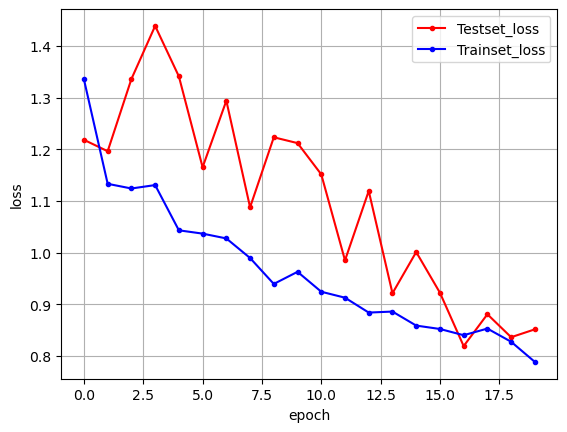

In [34]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']



# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')



# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

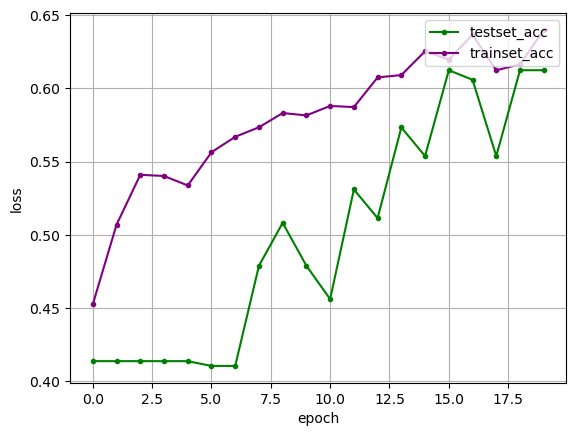

In [35]:
x_vacc=history.history['val_accuracy']
x_acc=history.history['accuracy']

plt.plot(x_len, x_vacc, marker='.', c="green", label='testset_acc')
plt.plot(x_len, x_acc, marker='.', c="purple", label='trainset_acc')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [36]:
import pandas as pd
pd.DataFrame(history.history)


,loss,accuracy,val_loss,val_accuracy
0,1.335139,0.452555,1.218325,0.413681
1,1.133208,0.506894,1.196267,0.413681
2,1.124149,0.540957,1.336024,0.413681
3,1.130770,0.540146,1.438733,0.413681
4,1.043227,0.533658,1.341055,0.413681
5,1.036828,0.556367,1.165259,0.410423
6,1.027516,0.566910,1.294021,0.410423
7,0.989632,0.573398,1.087756,0.478827
8,0.939456,0.583131,1.223233,0.508143
9,0.962928,0.581509,1.211983,0.478827
